# Cleaning Dataset

In [34]:
import dask.dataframe as dd
import os

# Define the folder name/path
folder_data = 'MLS Cleaned Dataset'

if not os.path.exists(folder_data):
    # Create the folder
    os.makedirs(folder_name)
    print(f"Folder '{folder_data}' created.")
else:
    print(f"Folder '{folder_data}' already exists.")


Folder 'MLS Cleaned Dataset' already exists.


### Cleaning 2023 Dataset

In [2]:
# Cleaning 2023 Dataset
print("Cleaning 2023 Dataset")
dd_2023 = dd.read_csv('MLS Dataset/mls stats_2023.csv')

dd_2023.columns = [col.replace('regular_season_statistics/', '') for col in dd_2023.columns]
dd_2023.columns = [col.replace('_', ' ') for col in dd_2023.columns]
dd_2023 = dd_2023.drop(columns=['club/sportec id','created','updated','id','season id','club/created','club/updated',
                                'club/id','club/opta id','venue id','country id','region id'])
dd_2023 = dd_2023.loc[9:]  # removing the qualifier match only stats
dd_2023.columns = [col.replace('/', ' ') for col in dd_2023.columns]
dd_2023 = dd_2023.loc[:, ~dd_2023.columns.duplicated()]
dd_2023 = dd_2023.drop(columns=['club year founded','type'])

dd_2023.to_csv('MLS Cleaned Dataset/mls stats_2023 cleaned.csv', single_file=True, index=False)


Cleaning 2023 Dataset


['C:\\python_workshop\\Major-league-Soccer-Analytics\\MLS Cleaned Dataset\\mls stats_2023 cleaned.csv']

### Cleaning 2022 Dataset

In [3]:
# Cleaning 2022 Dataset
print("Cleaning 2022 Dataset")
dd_2022 = dd.read_csv('MLS Dataset/mls stats_2022.csv')

dd_2022.columns = [col.replace('regular_season_statistics/', '') for col in dd_2022.columns]
dd_2022.columns = [col.replace('_', ' ') for col in dd_2022.columns]
dd_2022 = dd_2022.drop(columns=['club/sportec id','created','updated','id','season id','club/created','club/updated',
                                'club/id','club/opta id','venue id','country id','region id'])
dd_2022 = dd_2022.loc[2:]  # removing the qualifier match only stats
dd_2022.columns = [col.replace('/', ' ') for col in dd_2022.columns]
dd_2022 = dd_2022.loc[:, ~dd_2022.columns.duplicated()]
dd_2022 = dd_2022.drop(columns=['club year founded','type'])

dd_2022.to_csv('MLS Cleaned Dataset/mls stats_2022 cleaned.csv', single_file=True, index=False)


Cleaning 2022 Dataset


['C:\\python_workshop\\Major-league-Soccer-Analytics\\MLS Cleaned Dataset\\mls stats_2022 cleaned.csv']

### Cleaning 2021 Dataset

In [4]:
# Cleaning 2021 Dataset
print("Cleaning 2021 Dataset")
dd_2021 = dd.read_csv('MLS Dataset/mls stats_2021.csv',assume_missing=True)

dd_2021.columns = [col.replace('regular_season_statistics/', '') for col in dd_2021.columns]
dd_2021.columns = [col.replace('_', ' ') for col in dd_2021.columns]
dd_2021 = dd_2021.drop(columns=['club/sportec id','created','updated','id','season id','club/created','club/updated',
                                'club/id','club/opta id','venue id','country id','region id'])
dd_2021.columns = [col.replace('/', ' ') for col in dd_2021.columns]
dd_2021 = dd_2021.loc[:, ~dd_2021.columns.duplicated()]
dd_2021 = dd_2021.drop(columns=['club year founded','type'])
dd_2021 = dd_2021.loc[:-1]

dd_2021.to_csv('MLS Cleaned Dataset/mls stats_2021 cleaned.csv', single_file=True, index=False)


Cleaning 2021 Dataset


['C:\\python_workshop\\Major-league-Soccer-Analytics\\MLS Cleaned Dataset\\mls stats_2021 cleaned.csv']

### Cleaning 2020 Dataset

In [5]:
# Cleaning 2020 Dataset
print("Cleaning 2020 Dataset")
dd_2020 = dd.read_csv('MLS Dataset/mls stats_2020.csv',assume_missing=True)

dd_2020.columns = [col.replace('regular_season_statistics/', '') for col in dd_2020.columns]
dd_2020.columns = [col.replace('_', ' ') for col in dd_2020.columns]
dd_2020 = dd_2020.drop(columns=['club/sportec id','created','updated','id','season id','club/created','club/updated',
                                'club/id','club/opta id','venue id','country id','region id'])
dd_2020.columns = [col.replace('/', ' ') for col in dd_2020.columns]
dd_2020 = dd_2020.loc[:, ~dd_2020.columns.duplicated()]
dd_2020 = dd_2020.drop(columns=['club year founded','type'])
dd_2020 = dd_2020.loc[:-3]
dd_2020 = dd_2020.loc[~dd_2020['club id'].isin([4821, 4822])]

dd_2020.to_csv('MLS Cleaned Dataset/mls stats_2020 cleaned.csv', single_file=True, index=False)

Cleaning 2020 Dataset


['C:\\python_workshop\\Major-league-Soccer-Analytics\\MLS Cleaned Dataset\\mls stats_2020 cleaned.csv']

### Cleaning 2011-2019 Datasett

In [6]:
# Function to clean the dataset for 2020 and earlier
def clean_dataset_11_19(df):
    df.columns = [col.replace('regular_season_statistics/', '') for col in df.columns]
    df.columns = [col.replace('_', ' ') for col in df.columns]
    df = df.drop(columns=['club abbreviation', 'club/sportec id', 'created', 'updated', 'id', 'season id',
                          'club/created', 'club/updated', 'club/id', 'club/opta id', 'venue id', 'country id',
                          'region id'])
    df.columns = [col.replace('/', ' ') for col in df.columns]
    df = df.loc[:, ~df.columns.duplicated()]
    df = df.drop(columns=['club year founded', 'type'])
    df = df.loc[~df['club id'].isin([4821, 4822])]
    return df

# Cleaning 2011-2019 Datasets
print("Cleaning 2011-2019 Datasets")
for year in range(2011, 2020):
    input_path = f'MLS Dataset/mls stats_{year}.csv'
    output_path = f'MLS Cleaned Dataset/mls stats_{year} cleaned.csv'
    
    if os.path.exists(input_path):
        # Read the dataset
        df = dd.read_csv(input_path,assume_missing=True)
        
        # Clean the dataset
        df_cleaned = clean_dataset_11_19(df)
        
        # Save the cleaned dataset
        df_cleaned.to_csv(output_path, single_file=True, index=False)
        print(f"Cleaned dataset for {year} saved to {output_path}")
    else:
        print(f"File {input_path} does not exist")



Cleaning 2011-2019 Datasets
Cleaned dataset for 2011 saved to MLS Cleaned Dataset/mls stats_2011 cleaned.csv
Cleaned dataset for 2012 saved to MLS Cleaned Dataset/mls stats_2012 cleaned.csv
Cleaned dataset for 2013 saved to MLS Cleaned Dataset/mls stats_2013 cleaned.csv
Cleaned dataset for 2014 saved to MLS Cleaned Dataset/mls stats_2014 cleaned.csv
Cleaned dataset for 2015 saved to MLS Cleaned Dataset/mls stats_2015 cleaned.csv
Cleaned dataset for 2016 saved to MLS Cleaned Dataset/mls stats_2016 cleaned.csv
Cleaned dataset for 2017 saved to MLS Cleaned Dataset/mls stats_2017 cleaned.csv
Cleaned dataset for 2018 saved to MLS Cleaned Dataset/mls stats_2018 cleaned.csv
Cleaned dataset for 2019 saved to MLS Cleaned Dataset/mls stats_2019 cleaned.csv


### Checking for Uncommon and common columns for season 2011 to 2023
 Checking for common columns among all season and removing the uncommon columns

In [7]:
# Checking for Uncommon and common columns for season 2011 to 2023
print("Checking for common columns among all seasons and removing the uncommon columns")

# Initialize a list to store sets of columns from each dataset
columns_sets = []

# First loop to identify common columns
for year in range(2011, 2024):
    output_path = f'MLS Cleaned Dataset/mls stats_{year} cleaned.csv'
    
    if os.path.exists(output_path):
        # Read the dataset
        df = dd.read_csv(output_path)
        
        # Get the columns
        columns_sets.append(set(df.columns))
        
        # Get the number of rows and columns
        rows, cols = df.shape
        print(f"Dataset for {year}: {rows} rows, {cols} columns")

# Find common columns among all datasets
if columns_sets:
    common_columns = set.intersection(*columns_sets)
    all_columns = set.union(*columns_sets)
    excluded_columns = all_columns - common_columns

    print(f"Common columns across all datasets: {len(common_columns)} columns")
    print(common_columns)
    print(f"Excluded columns across all datasets: {len(excluded_columns)} columns")
    print(excluded_columns)
else:
    print("No datasets found.")

# Second loop to clean and save datasets with only common columns
for year in range(2011, 2024):
    output_path = f'MLS Cleaned Dataset/mls stats_{year} cleaned.csv'
    
    if os.path.exists(output_path):
        # Read the dataset
        df = dd.read_csv(output_path,assume_missing=True)
        
        # Keep only common columns
        df = df[list(common_columns)]
        
        # Save the cleaned dataset
        df.to_csv(output_path, single_file=True, index=False)
        print(f"Cleaned dataset for {year} saved with only common columns.")
    else:
        print(f"File {output_path} does not exist.")

Checking for common columns among all seasons and removing the uncommon columns
Dataset for 2011: Delayed('int-ebd61c5a-75c9-40c4-805c-f16e566955a5') rows, 119 columns
Dataset for 2012: Delayed('int-0930ef6d-4990-4d2c-8825-c77c839fd08f') rows, 117 columns
Dataset for 2013: Delayed('int-5f9b19c6-c414-4292-a190-8ae34b7ca7b0') rows, 118 columns
Dataset for 2014: Delayed('int-f2135b38-3c8a-4c83-98ab-067b9637838c') rows, 121 columns
Dataset for 2015: Delayed('int-9190a8d2-1a9c-45a9-bd08-1ec7370e280e') rows, 121 columns
Dataset for 2016: Delayed('int-762f5a20-f9fa-45db-91a2-cf98a4620d33') rows, 122 columns
Dataset for 2017: Delayed('int-f3f2dc52-4000-49f4-8a44-951f64c8a3ab') rows, 122 columns
Dataset for 2018: Delayed('int-8a6bca73-0a07-4dd0-acef-8e1904abc5df') rows, 122 columns
Dataset for 2019: Delayed('int-0ecb2df0-fbb4-4ed3-9105-11c841b4f986') rows, 122 columns
Dataset for 2020: Delayed('int-2493231f-544a-4226-be9c-1fa62478578b') rows, 125 columns
Dataset for 2021: Delayed('int-68426cbe-

### Calculate Points for each season

**Calculation**
- Games won = 3 points
- Games draw = 1 points

In [8]:
# Calculate Points for each season
print("Calculating points for each season")

# Function to clean the dataset and calculate points
def clean_and_calculate_points(df):
    df['points'] = df['total wins'] * 3 + df['total draws']
    return df

# Loop over the years 2011 to 2023
for year in range(2011, 2024):
    input_path = f'MLS Cleaned Dataset/mls stats_{year} cleaned.csv'
    
    if os.path.exists(input_path):
        # Read the dataset
        df = dd.read_csv(input_path)
        
        # Clean and calculate points
        df_with_points = clean_and_calculate_points(df)
        
        # Save the dataset with points
        df_with_points.to_csv(input_path, single_file=True, index=False)
        print(f"Dataset for {year} saved with points.")
    else:
        print(f"File {input_path} does not exist.")


Calculating points for each season
Dataset for 2011 saved with points.
Dataset for 2012 saved with points.
Dataset for 2013 saved with points.
Dataset for 2014 saved with points.
Dataset for 2015 saved with points.
Dataset for 2016 saved with points.
Dataset for 2017 saved with points.
Dataset for 2018 saved with points.
Dataset for 2019 saved with points.
Dataset for 2020 saved with points.
Dataset for 2021 saved with points.
Dataset for 2022 saved with points.
Dataset for 2023 saved with points.


### Check the shape of each dataset

In [9]:
# Checking the shape of the final cleaned datasets
print("Checking the shape of the final cleaned datasets")

for year in range(2011, 2024):
    output_path = f'MLS Cleaned Dataset/mls stats_{year} cleaned.csv'
    
    if os.path.exists(output_path):
        # Read the dataset
        df = dd.read_csv(output_path)
        
        # Get the number of rows and columns
        rows, cols = df.shape
        print(f"Final cleaned dataset for {year}: {rows} rows, {cols} columns")
    else:
        print(f"File {output_path} does not exist.")


Checking the shape of the final cleaned datasets
Final cleaned dataset for 2011: Delayed('int-3aa6a801-2f44-4893-8e45-c330780c97e0') rows, 117 columns
Final cleaned dataset for 2012: Delayed('int-4c652438-c365-4179-9dcb-0d8841047036') rows, 117 columns
Final cleaned dataset for 2013: Delayed('int-b09d21d5-971a-45ae-a347-a9a76acdf419') rows, 117 columns
Final cleaned dataset for 2014: Delayed('int-6de65342-3d06-454b-a801-e336a36af5af') rows, 117 columns
Final cleaned dataset for 2015: Delayed('int-af5414a0-3840-472d-8844-09c7de155100') rows, 117 columns
Final cleaned dataset for 2016: Delayed('int-db36438c-7858-42e1-932f-2960ceecd627') rows, 117 columns
Final cleaned dataset for 2017: Delayed('int-eb35f3f7-f08e-4339-9818-7173eda4a7ba') rows, 117 columns
Final cleaned dataset for 2018: Delayed('int-0017ed08-de7d-4f49-8c94-4a06aa4ff7af') rows, 117 columns
Final cleaned dataset for 2019: Delayed('int-7855517d-8e5c-4e90-85fb-4d06ed02b13f') rows, 117 columns
Final cleaned dataset for 2020: D

### Merging all Season

In [13]:
# Function to read and merge datasets for given years using Dask
def merge_datasets(years):
    dfs = []
    for year in years:
        filename = f'MLS Cleaned Dataset/mls stats_{year} cleaned.csv'
        
        if os.path.exists(filename):
            df = dd.read_csv(filename)
            df['season'] = year  # Add season column for identification
            dfs.append(df)
    
    all_data = dd.concat(dfs, ignore_index=True)
    return all_data

years_to_merge = range(2011, 2024)
merged_data_dask = merge_datasets(years_to_merge)

# Function to convert columns to int64 except 'club name'
def convert_to_int64_if_not_club_name(df):
    for col in df.columns:
        if col != 'club name':
            # Convert to numeric, coercing errors to NaN, then to integer
            df[col] = dd.to_numeric(df[col], errors='coerce').astype('Int64')
            df[col] = df[col].fillna(0) 
    return df

# Convert columns to int64
converted_data = convert_to_int64_if_not_club_name(merged_data_dask)


# Convert columns to int64
converted_data = convert_to_int64_if_not_club_name(merged_data_dask)
# Save merged dataset to CSV using Dask's to_csv method
merged_data_dask.to_csv('MLS Cleaned Dataset/All merged.csv', index=False, single_file=True)

print("Merged dataset saved to 'All merged.csv'.")


Merged dataset saved to 'All merged.csv'.


### Calculation of Team Statistics (Averages and Medians)
This section calculates both team averages and medians for numeric columns grouped by 'club id'.

In [14]:
# Function to calculate team averages and medians for numeric columns
def calculate_team_stats(data, stat_type='mean'):
    numeric_cols = data.select_dtypes(include='number').columns
    
    if stat_type == 'mean':
        team_stats = data[numeric_cols].groupby('club id').mean().round(2)
    elif stat_type == 'median':
        team_stats = data[numeric_cols].groupby('club id').median().round(2)
    else:
        raise ValueError("Invalid stat_type. Use 'mean' or 'median'.")
    
    return team_stats

# Example usage with Dask DataFrame
team_averages_dask = calculate_team_stats(merged_data_dask, stat_type='mean')
team_medians_dask = calculate_team_stats(merged_data_dask, stat_type='median')

# Save team averages and medians to CSV with Dask
team_averages_dask.to_csv('MLS Cleaned Dataset/Team Averages.csv', single_file=True, index=True)
team_medians_dask.to_csv('MLS Cleaned Dataset/Team Medians.csv', single_file=True, index=True)

print("Team averages and medians calculated and saved to 'Team Averages.csv' and 'Team Medians.csv'.")


Team averages and medians calculated and saved to 'Team Averages.csv' and 'Team Medians.csv'.


# Expolatory Data Analysis

## Dividing into 4 Set metrics

- Goals
- Attack
- Defense
- Possession

In [7]:
## Expolatory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

goals_metrics = [
    'goals', 'att ibox goal', 'att obox goal', 'att lf goal', 'att rf goal', 'att pen goal',
    'goals conceded', 'goals conceded ibox', 'goals conceded obox',
    'points'
]

attacks_metrics = [
    'total scoring att', 'ontarget scoring att', 'att ibox goal', 'att obox goal', 'att lf goal', 'att rf goal',
    'att setpiece', 'att freekick goal',
    'points'
]

defense_metrics = [
    'saves', 'clean sheet',
    'total clearance', 'interception', 'outfielder block',
    'goals conceded', 'goals conceded ibox', 'goals conceded obox',
    'points'
]

possession_metrics = [
    'possession percentage',
    'accurate pass', 'successful open play pass', 'successful dribble',
    'points'
]


# Function to compute stats

In [8]:
import pandas as pd

In [9]:
# Function to filter and compute statistics
def compute_statistics_and_correlations(df):
    # Filter numeric columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Compute descriptive statistics for numeric columns
    statistics = df[numeric_columns].describe()
    
    # Compute correlations for numeric columns
    correlations = df[numeric_columns].corr()
    
    return statistics, correlations


In [10]:
# File paths
averages_file = 'MLS Cleaned Dataset/Team Averages.csv'
medians_file = 'MLS Cleaned Dataset/Team Medians.csv'
merged_file = 'MLS Cleaned Dataset/All merged.csv'

# Read datasets
df_averages = pd.read_csv(averages_file)
df_medians = pd.read_csv(medians_file)
df_merged = pd.read_csv(merged_file)

# Extract relevant metrics from averages and medians
df_goals = df_averages[goals_metrics]
df_attack = df_averages[attacks_metrics]
df_defense = df_averages[defense_metrics]
df_possession = df_averages[possession_metrics]

dd_goals = df_medians[goals_metrics]
dd_attack = df_medians[attacks_metrics]
dd_defense = df_medians[defense_metrics]
dd_possession = df_medians[possession_metrics]

# Compute statistics and correlations
statistics_goals, correlations_goals = compute_statistics_and_correlations(df_goals)
statistics_attack, correlations_attack = compute_statistics_and_correlations(df_attack)
statistics_defense, correlations_defense = compute_statistics_and_correlations(df_defense)
statistics_possession, correlations_possession = compute_statistics_and_correlations(df_possession)

statistics_median_goals, correlations_median_goals = compute_statistics_and_correlations(dd_goals)
statistics_median_attack, correlations_median_attack = compute_statistics_and_correlations(dd_attack)
statistics_median_defense, correlations_median_defense = compute_statistics_and_correlations(dd_defense)
statistics_median_possession, correlations_median_possession = compute_statistics_and_correlations(dd_possession)

# Print correlations for the current dataset
print("\nCorrelation Matrix for Averages Goals:")
print(correlations_goals)
print("\nCorrelation Matrix for Averages Attack:")
print(correlations_attack)
print("\nCorrelation Matrix for Averages Defense:")
print(correlations_defense)
print("\nCorrelation Matrix for Averages Possession:")
print(correlations_possession)

print("\nCorrelation Matrix for Medians Goals:")
print(correlations_median_goals)
print("\nCorrelation Matrix for Medians Attack:")
print(correlations_median_attack)
print("\nCorrelation Matrix for Medians Defense:")
print(correlations_median_defense)
print("\nCorrelation Matrix for Medians Possession:")
print(correlations_median_possession)


Correlation Matrix for Averages Goals:
                        goals  att ibox goal  att obox goal  att lf goal  \
goals                1.000000       0.983943       0.423582     0.671722   
att ibox goal        0.983943       1.000000       0.255103     0.638372   
att obox goal        0.423582       0.255103       1.000000     0.399359   
att lf goal          0.671722       0.638372       0.399359     1.000000   
att rf goal          0.752537       0.736586       0.338312     0.104308   
att pen goal         0.559227       0.571986       0.126991     0.552470   
goals conceded      -0.403545      -0.423987      -0.034192    -0.246993   
goals conceded ibox -0.257427      -0.281259       0.033044    -0.170810   
goals conceded obox -0.664541      -0.659049      -0.255327    -0.358543   
points               0.870448       0.874348       0.277688     0.608973   

                     att rf goal  att pen goal  goals conceded  \
goals                   0.752537      0.559227       -0.4

### LinePlot
Ploting a line plot to see goal of each team over all seasons

C:\Users\tobip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tobip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tobip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\tobip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

Folder 'Images' already exists.


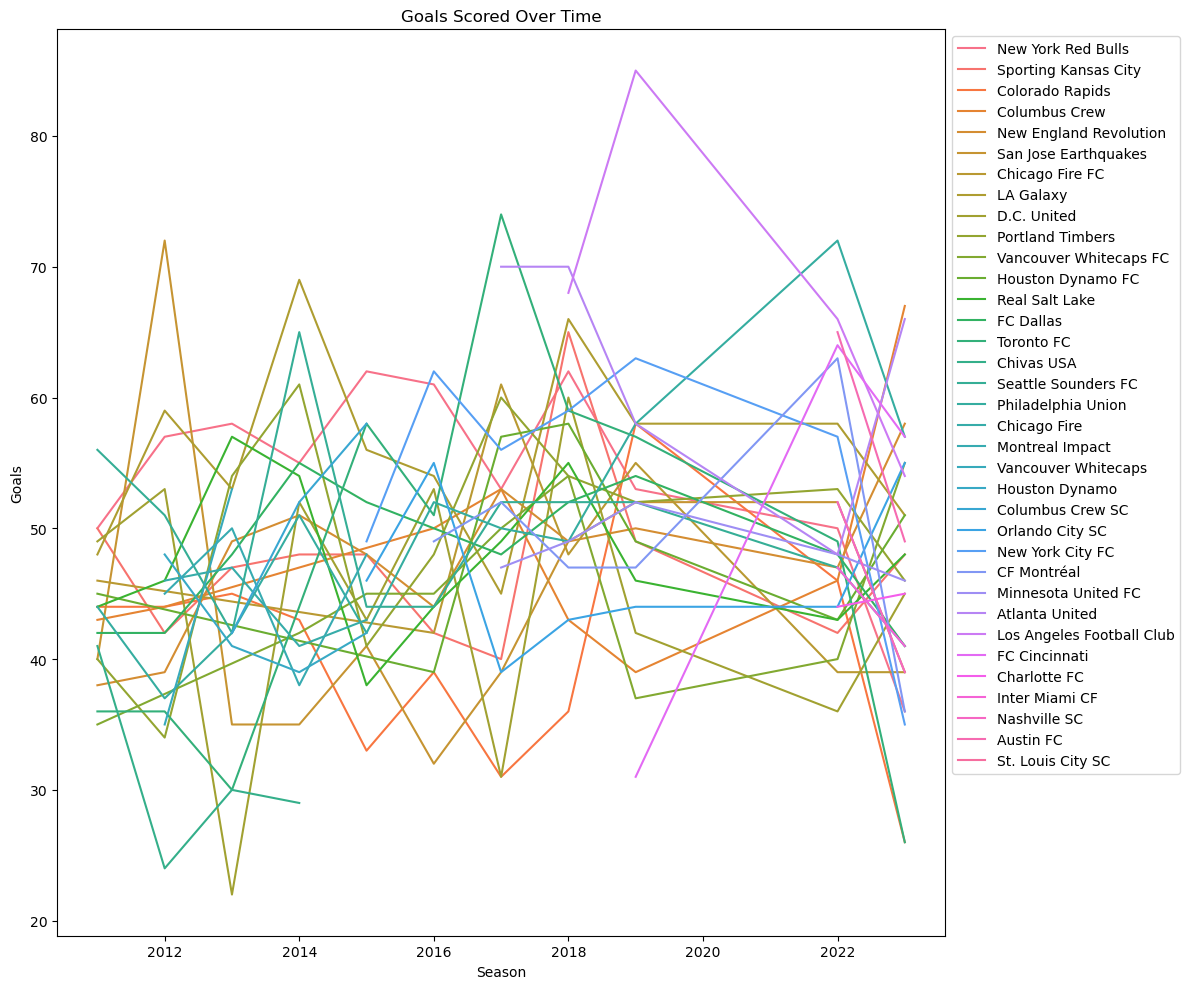

In [11]:
# Line Plot
merged_file = pd.read_csv('MLS Cleaned Dataset/All merged.csv')
# Line Plot Over Time
plt.figure(figsize=(12, 10))
sns.lineplot(x='season', y='goals', hue='club name', data=merged_file)
plt.title('Goals Scored Over Time')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
# plt.show()

folder_image ='Images'

if not os.path.exists(folder_image):
    # Create the folder
    os.makedirs(folder_image)
    print(f"Folder '{folder_image}' created.")
else:
    print(f"Folder '{folder_image}' already exists.")

plt.savefig('Images/Goals Scored Over Time')

### ScatterPlot

Plotting a Scatterplot fro Team average and median for the following:
- Goals vs Points
- Goals Conceded vs Points

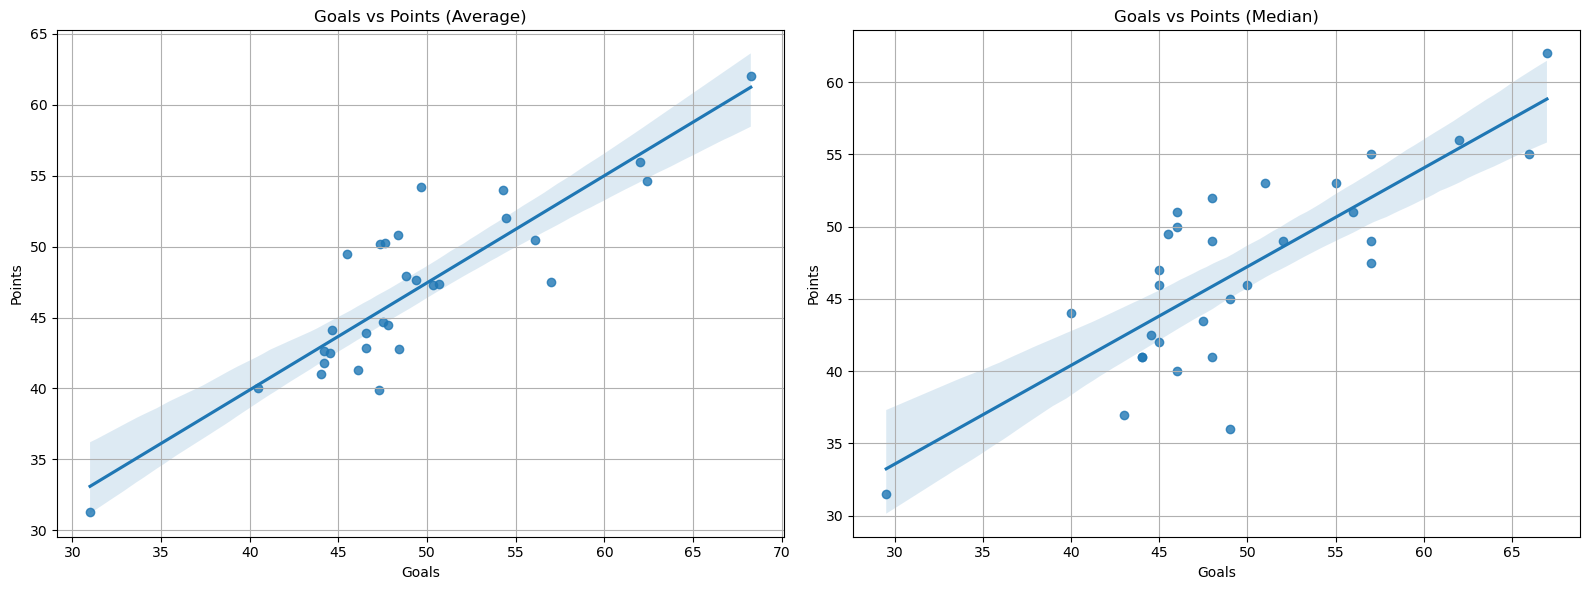

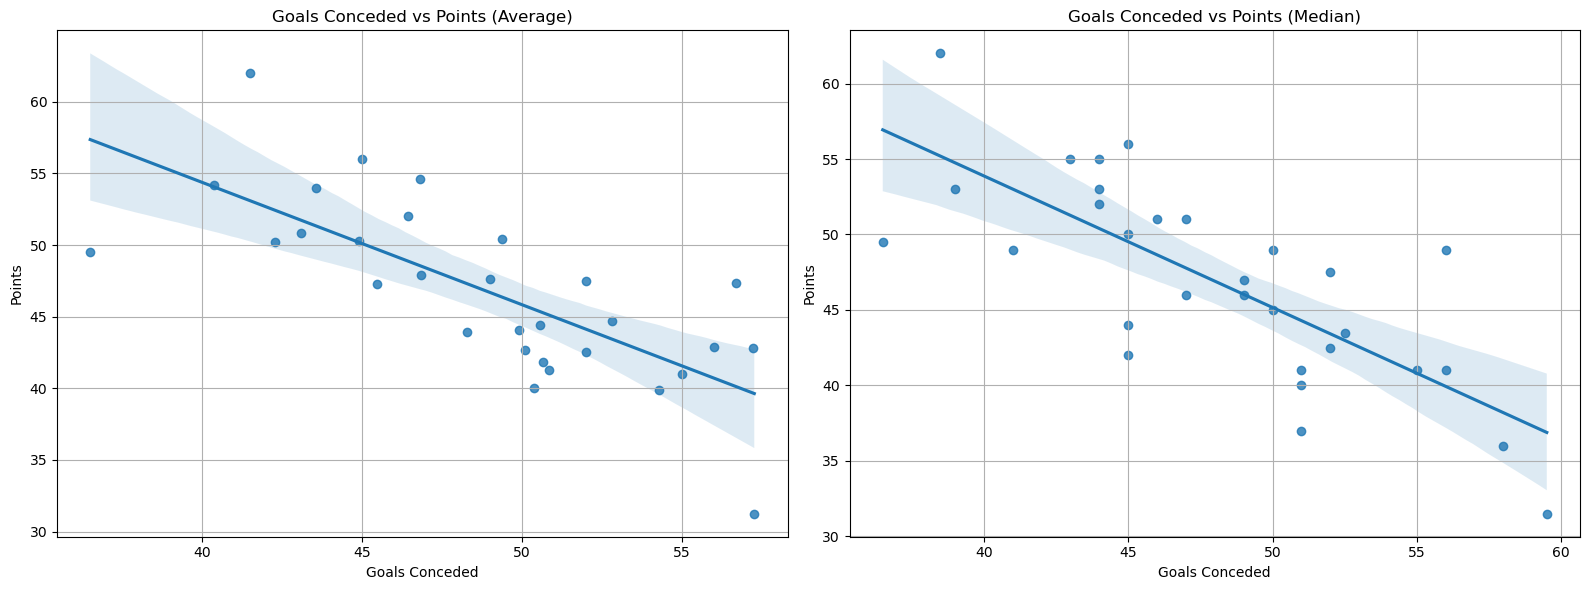

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


# Read data from CSV files
averages_file = pd.read_csv('MLS Cleaned Dataset/Team Averages.csv')
medians_file = pd.read_csv('MLS Cleaned Dataset/Team Medians.csv')

# Define metrics and titles for goals vs points
goals_metrics = 'goals'
goals_conceded_metrics = 'goals conceded'
points_metrics = 'points'
title_avg_goals_points = 'Goals vs Points (Average)'
title_median_goals_points = 'Goals vs Points (Median)'
x_label_goals_points = 'Goals'
y_label_goals_points = 'Points'

# Define metrics and titles for goals conceded vs points
title_avg_goals_conceded_points = 'Goals Conceded vs Points (Average)'
title_median_goals_conceded_points = 'Goals Conceded vs Points (Median)'
x_label_goals_conceded_points = 'Goals Conceded'
y_label_goals_conceded_points = 'Points'

# Scatter plot for goals vs points (Average and Median)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Average plot
sns.regplot(x=goals_metrics, y=points_metrics, data=averages_file, ax=axes[0])
axes[0].set_title(title_avg_goals_points)
axes[0].set_xlabel(x_label_goals_points)
axes[0].set_ylabel(y_label_goals_points)
axes[0].grid(True)

# Median plot
sns.regplot(x=goals_metrics, y=points_metrics, data=medians_file, ax=axes[1])
axes[1].set_title(title_median_goals_points)
axes[1].set_xlabel(x_label_goals_points)
axes[1].set_ylabel(y_label_goals_points)
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
# plt.show()
plt.savefig('Images/Goals vs Points')
# Scatter plot for goals conceded vs points (Average and Median)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Average plot
sns.regplot(x=goals_conceded_metrics, y=points_metrics, data=averages_file, ax=axes[0])
axes[0].set_title(title_avg_goals_conceded_points)
axes[0].set_xlabel(x_label_goals_conceded_points)
axes[0].set_ylabel(y_label_goals_conceded_points)
axes[0].grid(True)

# Median plot
sns.regplot(x=goals_conceded_metrics, y=points_metrics, data=medians_file, ax=axes[1])
axes[1].set_title(title_median_goals_conceded_points)
axes[1].set_xlabel(x_label_goals_conceded_points)
axes[1].set_ylabel(y_label_goals_conceded_points)
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
# plt.show()
plt.savefig('Images/Goals Conceded vs Points')

### Box plot of the merged data

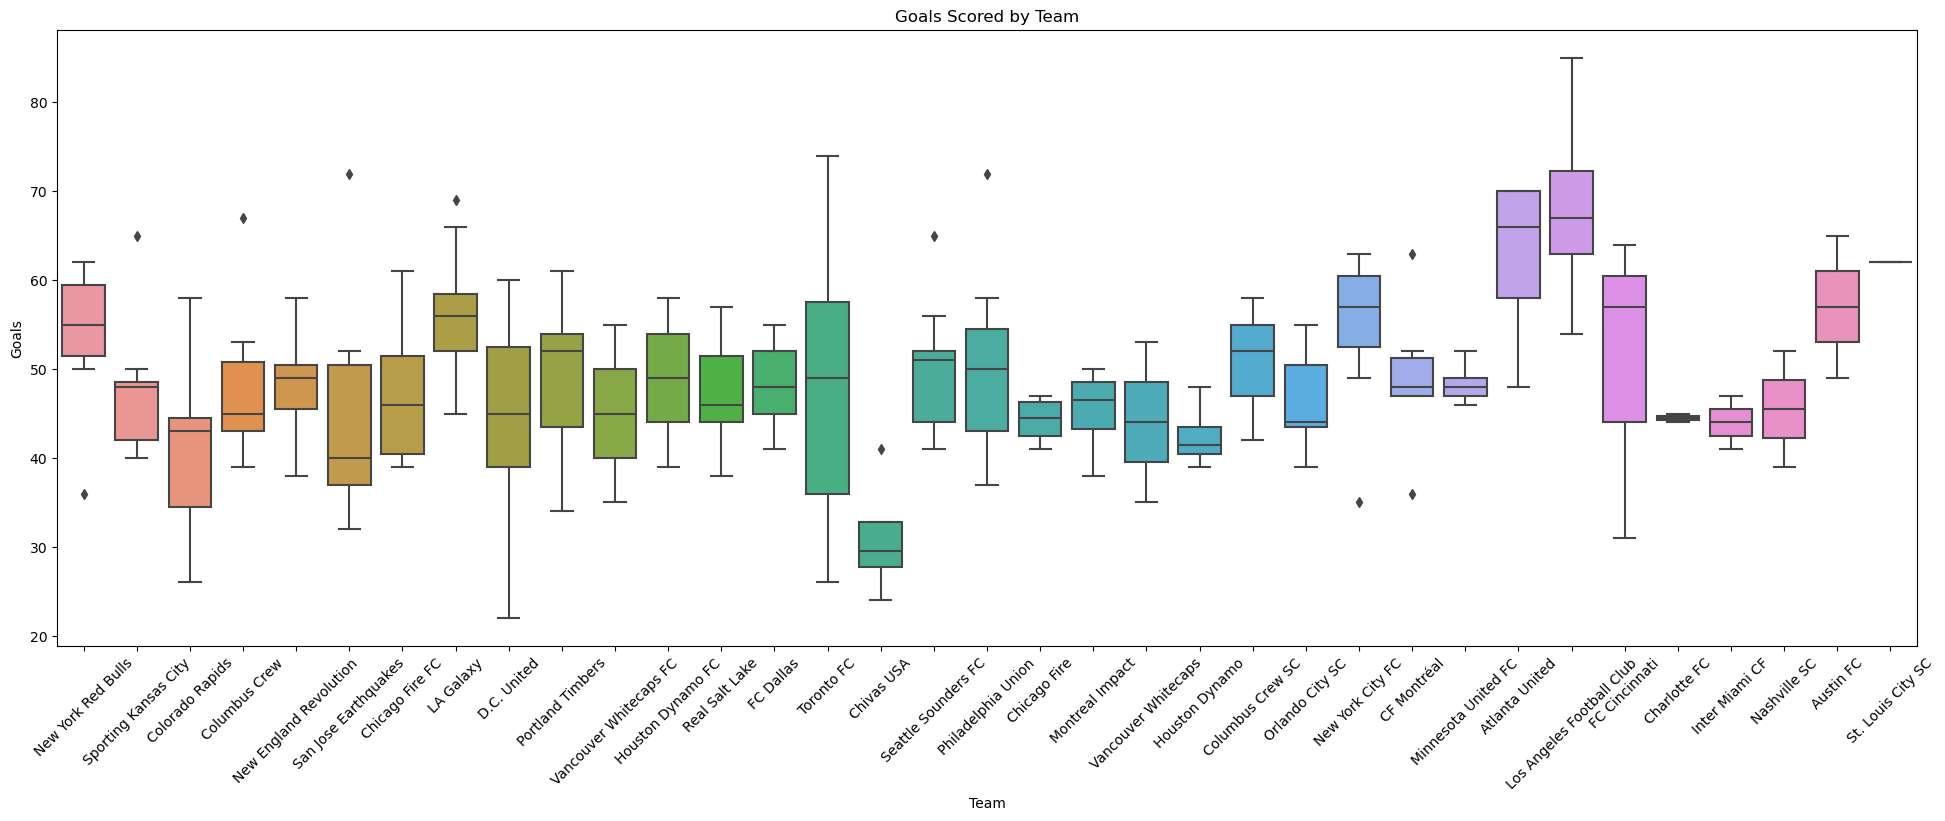

In [13]:
#Box plots
plt.figure(figsize=(24, 8))
sns.boxplot(x='club name', y='goals', data=merged_file)
plt.title('Goals Scored by Team')
plt.xlabel('Team')
plt.ylabel('Goals')
plt.xticks(rotation=45)
# plt.show()
plt.savefig('Images/Goals Scored by team')

### Creating HeatMaps for each metric to find its correlations with Points

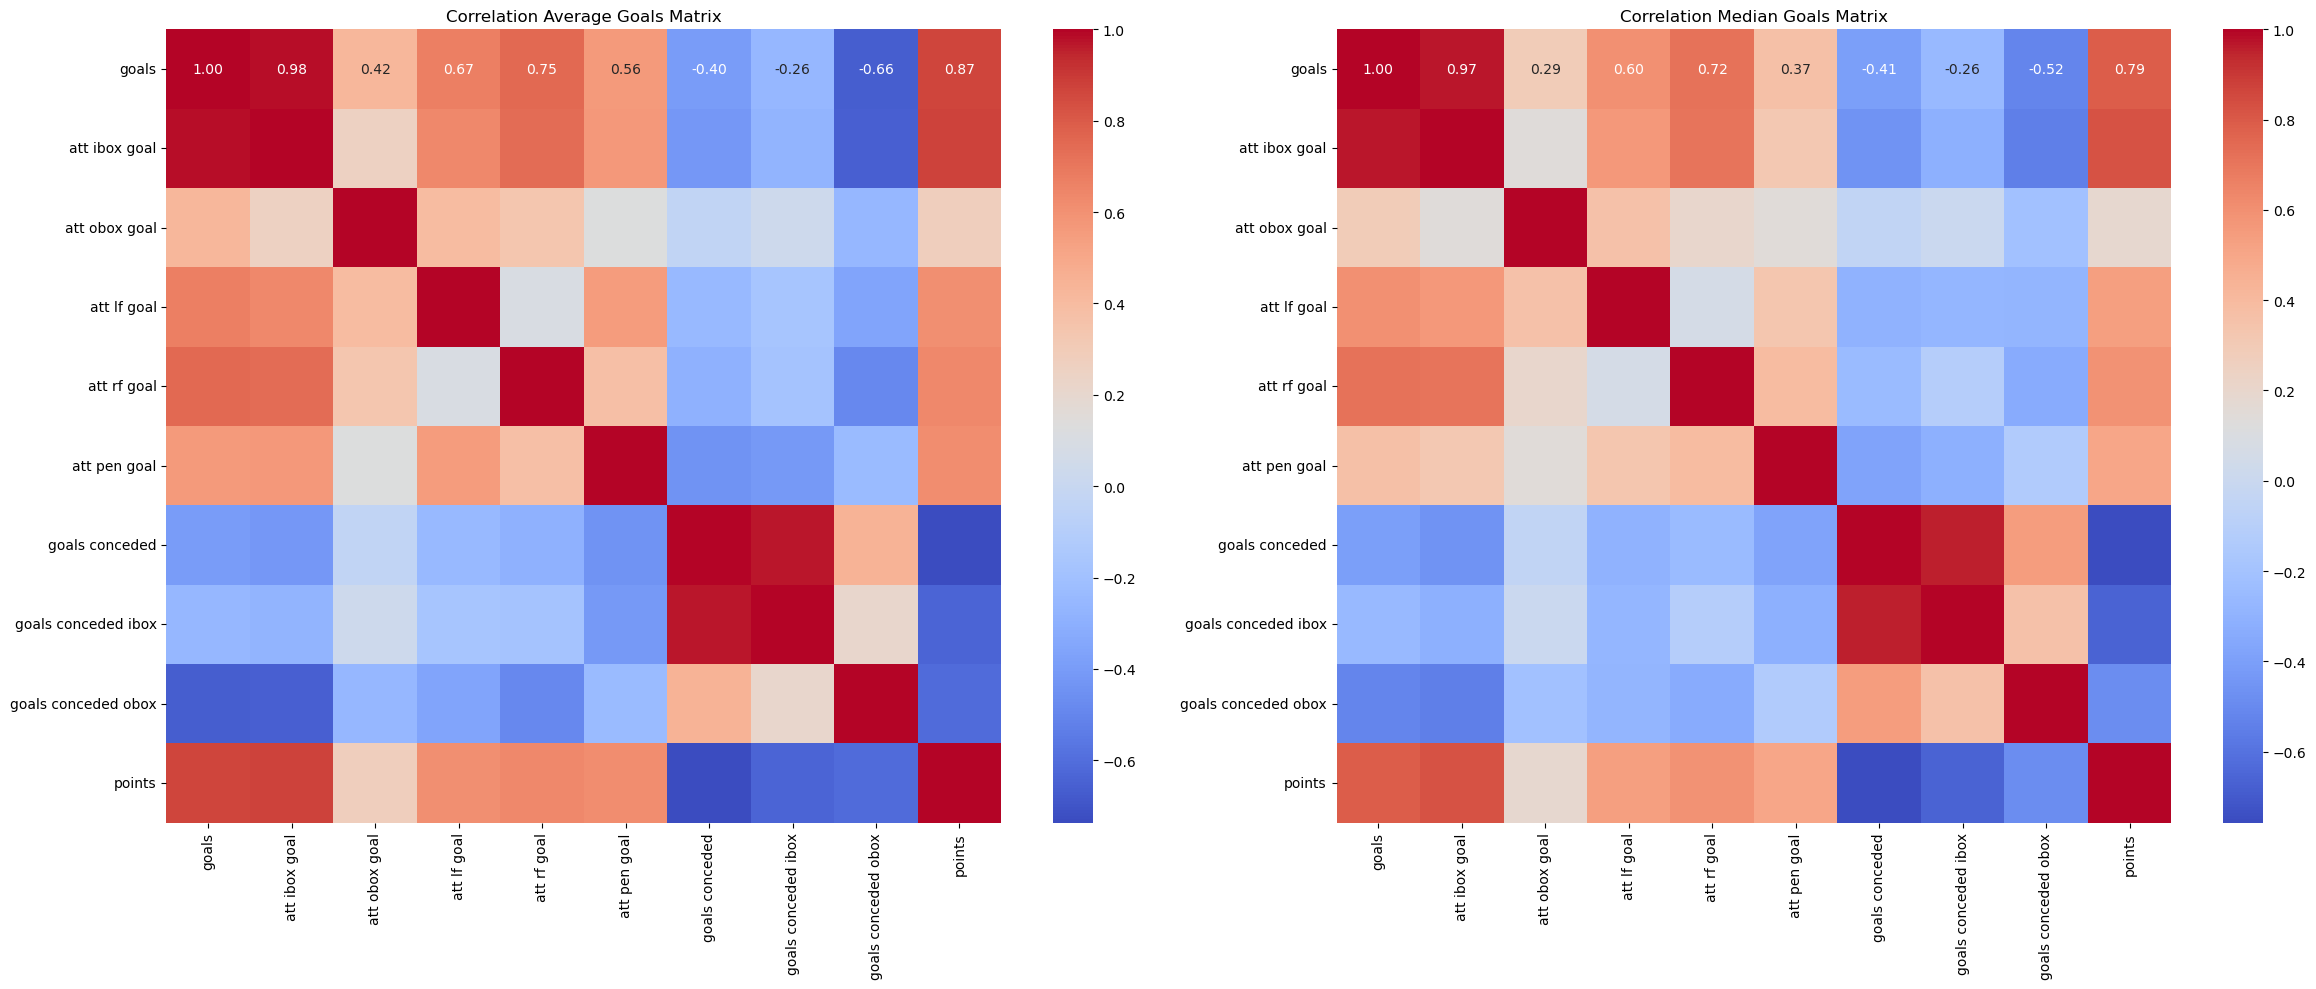

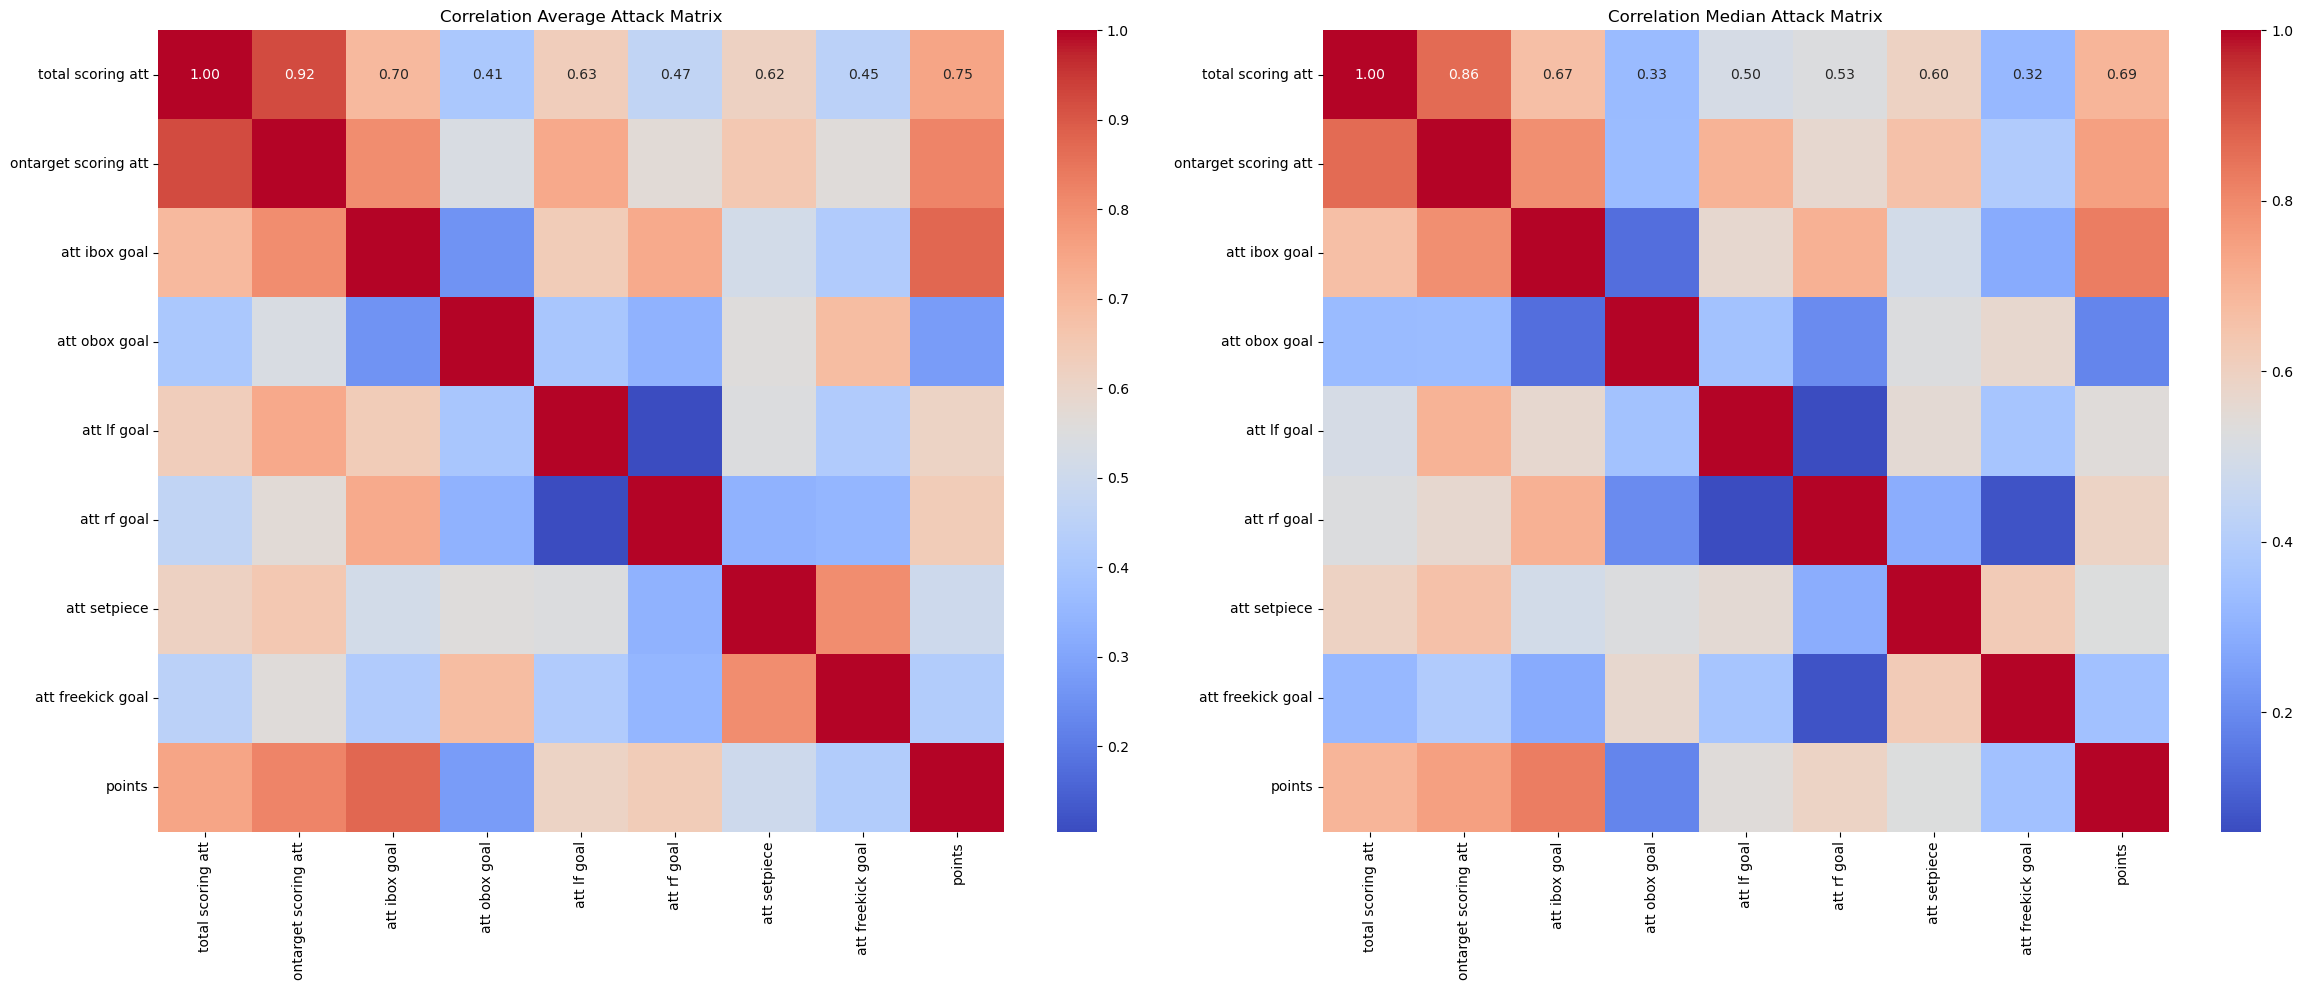

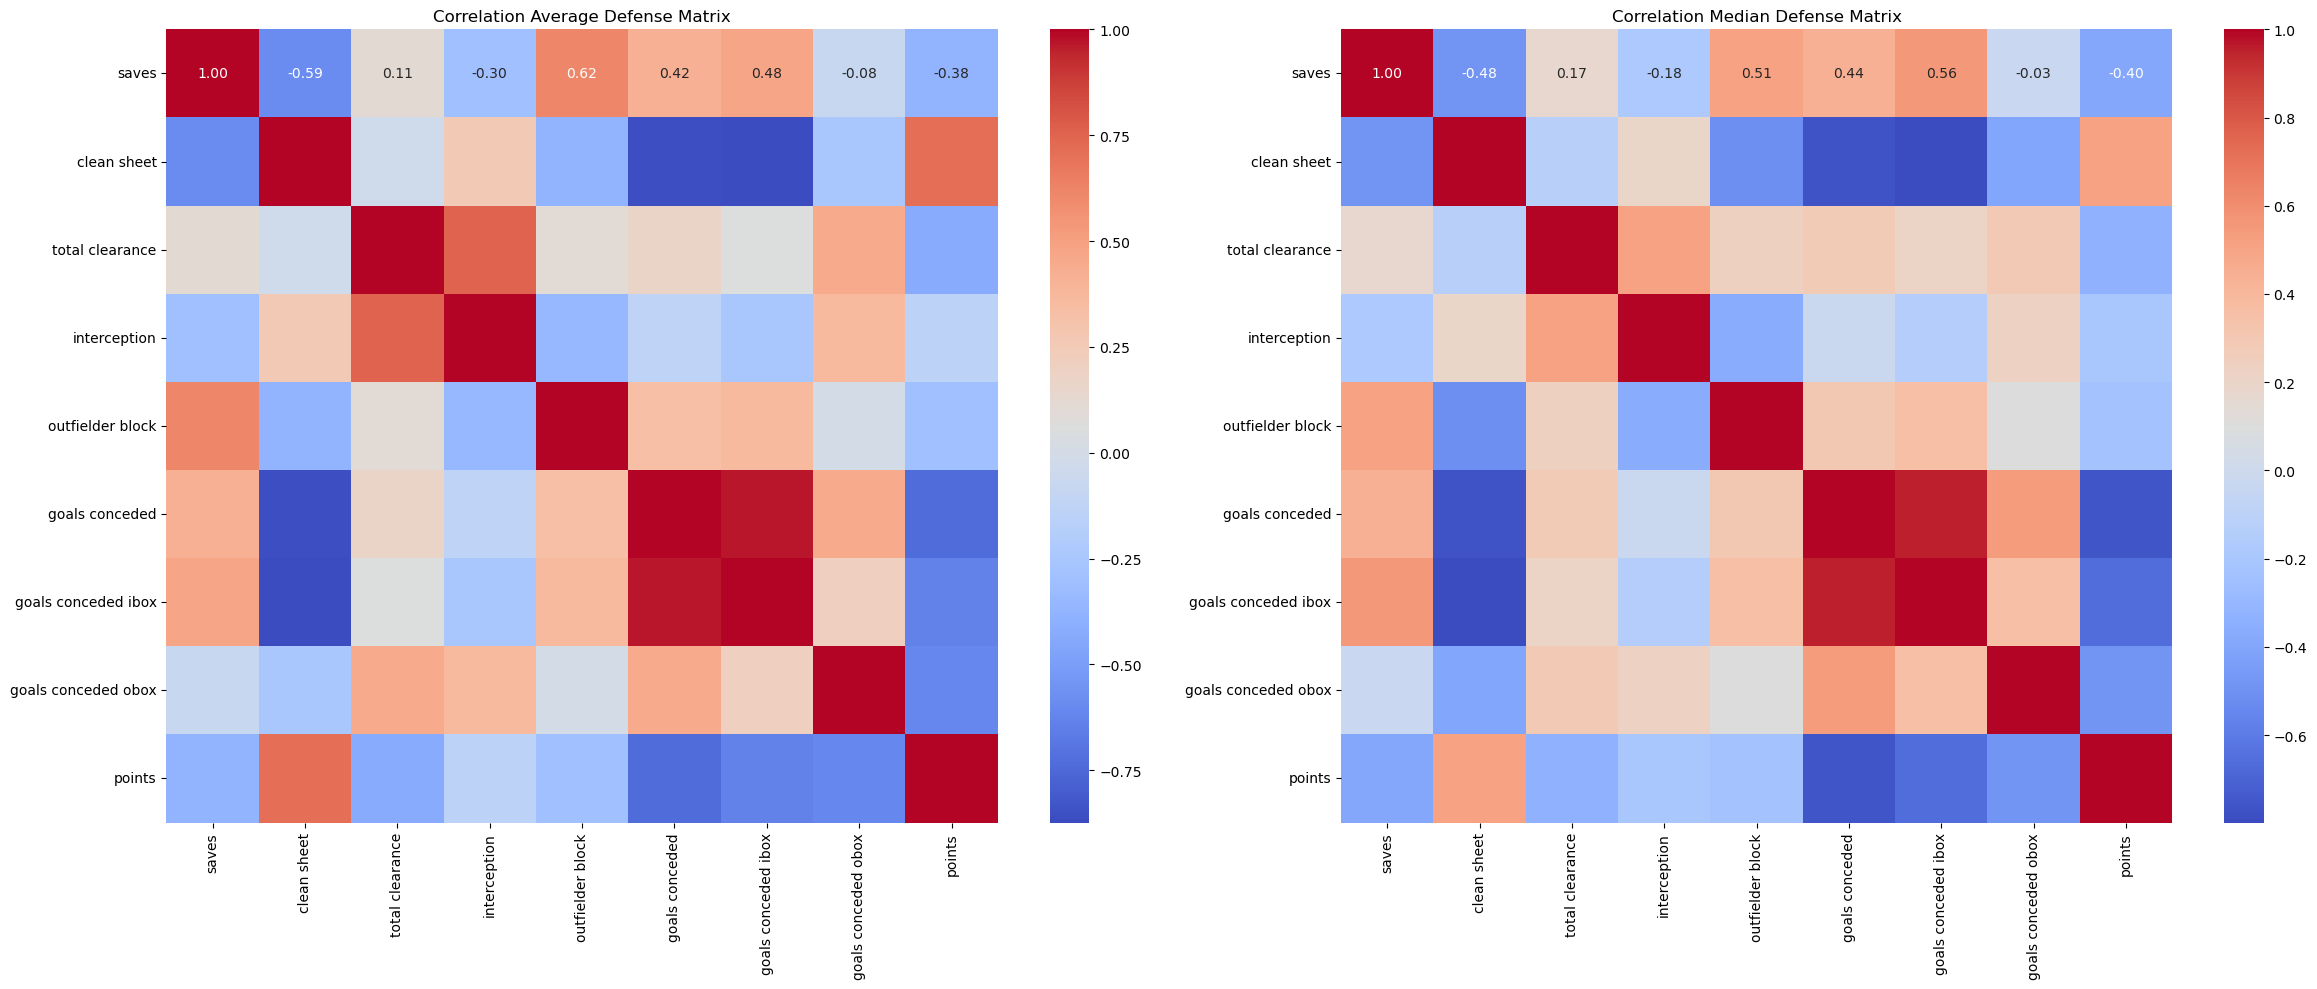

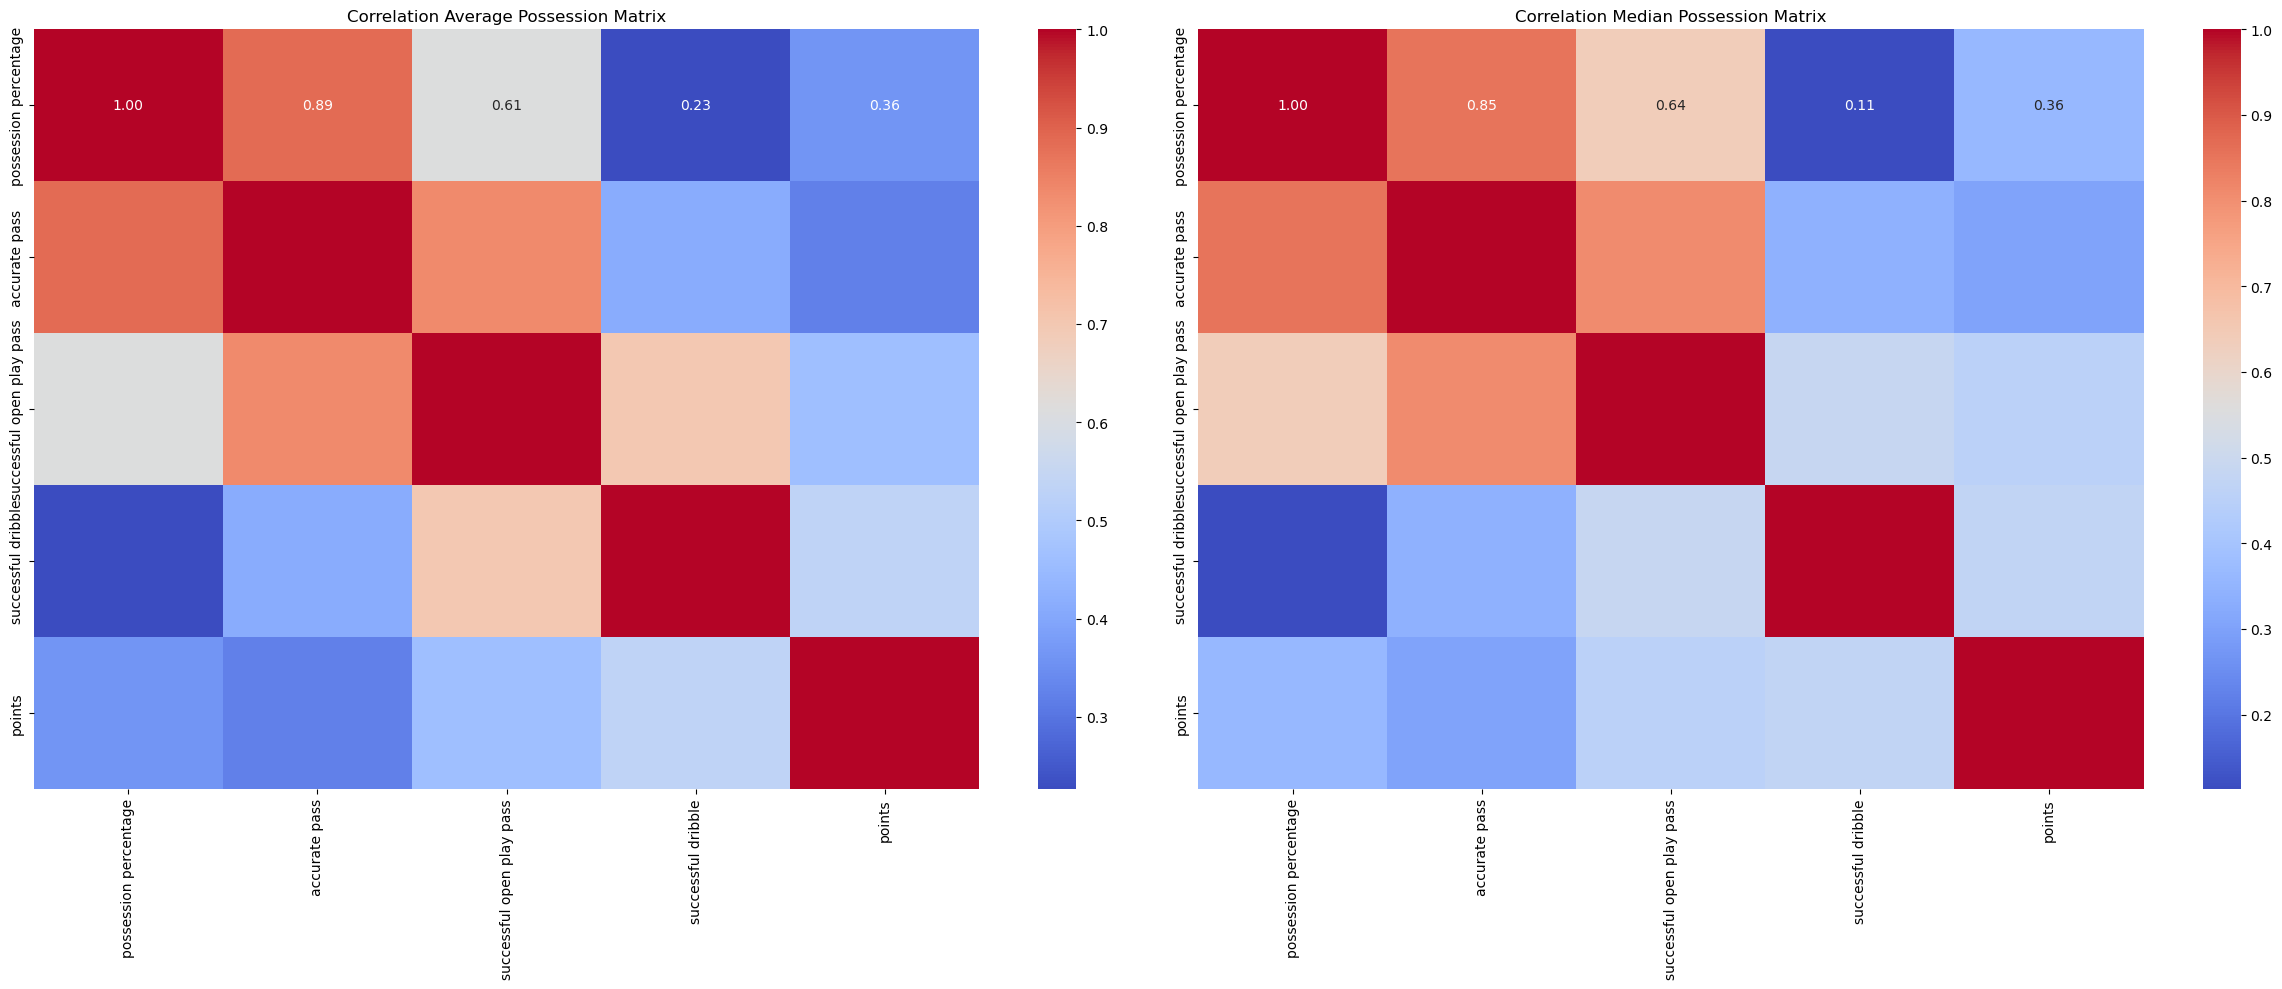

In [14]:
# Define heatmap plotting function
def plot_heatmap(data, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))

    # First heatmap (Average)
    sns.heatmap(data['average'], annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
    axes[0].set_title(f'Correlation Average {title} Matrix')

    # Second heatmap (Median)
    sns.heatmap(data['median'], annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
    axes[1].set_title(f'Correlation Median {title} Matrix')

    # Adjust layout
    plt.tight_layout()
    # plt.show()
    plt.savefig(f'Images/{title} Correlations HeatMap')

# Define titles and labels
titles = {
    'goals': 'Goals',
    'attack': 'Attack',
    'defense': 'Defense',
    'possession': 'Possession'
}

# Define correlations data (assuming you have them loaded appropriately)
correlations = {
    'goals': {'average': correlations_goals, 'median': correlations_median_goals},
    'attack': {'average': correlations_attack, 'median': correlations_median_attack},
    'defense': {'average': correlations_defense, 'median': correlations_median_defense},
    'possession': {'average': correlations_possession, 'median': correlations_median_possession}
}

# Plot heatmaps for each metric
for metric in correlations:
    plot_heatmap(correlations[metric], titles[metric])


### Observation:

**Goals Correlation Matrix**:

Positive Correlations: Goals have strong positive correlations with metrics like att ibox goal, att rf goal, and penalties scored (att pen goal). This indicates that teams scoring more goals tend to perform well in these specific areas.

Negative Correlations: Goals conceded have negative correlations with points, suggesting that conceding fewer goals is associated with earning more points.

**Attack Correlation Matrix**:

Positive Correlations: Total scoring attempts and on-target scoring attempts are highly correlated, indicating teams that create more chances also hit the target more frequently.

Impact on Points: Metrics like attempts in the box (att ibox goal) and right-footed goals (att rf goal) show strong positive correlations with points, suggesting these metrics strongly influence a team's performance in terms of points.

**Defense Correlation Matrix**:

Impact of Clean Sheets: Clean sheets (not conceding goals) show a strong positive correlation with points, indicating that defensive solidity contributes significantly to earning points.

Other Defensive Metrics: Metrics like saves, interceptions, and total clearances also correlate with points, albeit to a lesser extent.

**Possession Correlation Matrix**:

Positive Correlations: Possession percentage and accurate passing have a strong positive correlation, indicating teams that dominate possession tend to pass accurately as well.

Impact on Points: Interestingly, possession percentage and accurate passing show relatively weaker correlations with points compared to other subsets. Successful open play passes and dribbles also correlate positively with points but to a moderate extent. to a moderate extent.

# Machine learning

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score, confusion_matrix, precision_score, recall_score


goals_features = [
    'goals', 'goals conceded', 'own goals'
]

attack_features = [
    'ontarget scoring att', 'total scoring att', 'open play pass', 'blocked scoring att'
]

defense_features = [
    'saves', 'total clearance', 'interception'
]

possession_features = [
    'successful open play pass', 'successful short pass', 'accurate pass'
]

# Define weights for each feature within subsets (adjust as needed)
weights = {
    'goals': [0.80, -0.80, -0.10],
    'attack': [0.15, 0.20, 0.10, 0.10],
    'defense': [0.15, 0.10, 0.15],
    'possession': [0.25, 0.25, 0.25]
}


# Combine all features and weights into a dictionary
feature_weights = {
    'goals': (goals_features, weights['goals']),
    'attack': (attack_features, weights['attack']),
    'defense': (defense_features, weights['defense']),
    'possession': (possession_features, weights['possession'])
}

### Liner Regression on Averages of Team

In [16]:
# Combine all features and apply weights
X = pd.DataFrame()
for subset, (features, subset_weights) in feature_weights.items():
    X[subset] = averages_file[features].dot(subset_weights)

# Target variable
y = averages_file['points']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize linear regression model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Average of Teams): {mse}")


# Print coefficients
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
print("\nCoefficients:")
print(coefficients)


Mean Squared Error (Average of Teams): 2.536776088156992

Coefficients:
            Coefficient
goals          0.691315
attack         0.012009
defense        0.048412
possession    -0.001247


### Merged Data

In [17]:
# Combine all features and apply weights
X = pd.DataFrame()
for subset, (features, subset_weights) in feature_weights.items():
    X[subset] = merged_file[features].dot(subset_weights)

# Target variable
y = merged_file['points']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize linear regression model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Merged of Teams): {mse}")

# Print coefficients
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
print("\nCoefficients:")
print(coefficients)


Mean Squared Error (Merged of Teams): 23.1479266906127

Coefficients:
            Coefficient
goals          0.752162
attack         0.000787
defense        0.008591
possession    -0.000050


### Median 

In [18]:
# Combine all features and apply weights
X = pd.DataFrame()
for subset, (features, subset_weights) in feature_weights.items():
    X[subset] = medians_file[features].dot(subset_weights)

# Target variable
y = medians_file['points']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize linear regression model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Median of Teams): {mse}")

# Print coefficients
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
print("\nCoefficients:")
print(coefficients)


Mean Squared Error (Median of Teams): 2.6335112921996484

Coefficients:
            Coefficient
goals          0.721874
attack        -0.008910
defense        0.031992
possession     0.001453


# Analysis:
The Average of Teams dataset has the lowest Mean Squared Error, indicating that the linear regression model fitted on this dataset performs best in predicting the target variable (points).
The Median of Teams dataset has a higher MSE compared to the Average of Teams, suggesting that using median values might not capture the variability in the data as effectively as using average values.
The Merged of Teams dataset has the highest MSE, indicating that combining data from multiple seasons (or teams) might introduce more noise or less relevant information for predicting points

Create a weighted score for each metrics 

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Define features for each subset
goals_features = [
    'goals', 'goals conceded'
]

attack_features = [
    'ontarget scoring att', 'total scoring att', 'open play pass'
]

defense_features = [
    'saves', 'total clearance', 'interception'
]

possession_features = [
    'successful open play pass', 'successful short pass', 'accurate pass'
]

# Define weights for each feature within subsets 
weights = {
    'goals': [0.80, -0.80],
    'attack': [0.15, 0.20, 0.10],
    'defense': [0.15, 0.10, 0.15],
    'possession': [0.25, 0.25, 0.25]
}

# Combine all features into a single list
all_features = goals_features + attack_features + defense_features + possession_features

# Function to apply Min-Max scaling to each feature separately
def min_max_scale_each_feature(df, features):
    scaled_df = df.copy()
    scaler = MinMaxScaler()
    scaled_df[features] = scaler.fit_transform(df[features])
    return scaled_df

# Apply Min-Max scaling to the relevant columns in Team Median and Team Averages
team_median_scaled = min_max_scale_each_feature(medians_file, all_features)
team_averages_scaled = min_max_scale_each_feature(averages_file, all_features)
all_season_scaled = min_max_scale_each_feature(merged_file, all_features)

# Function to calculate weighted score for each feature within each subset
def calculate_weighted_score(df, features, weights):
    return (df[features] * weights).sum(axis=1).round(2)

# Calculate weighted scores for Team Median
medians_file['goal_weighted_score'] = calculate_weighted_score(team_median_scaled, goals_features, weights['goals'])
medians_file['attack_weighted_score'] = calculate_weighted_score(team_median_scaled, attack_features, weights['attack'])
medians_file['defense_weighted_score'] = calculate_weighted_score(team_median_scaled, defense_features, weights['defense'])
medians_file['possession_weighted_score'] = calculate_weighted_score(team_median_scaled, possession_features, weights['possession'])

# Calculate weighted scores for Team Averages
averages_file['goal_weighted_score'] = calculate_weighted_score(team_averages_scaled, goals_features, weights['goals'])
averages_file['attack_weighted_score'] = calculate_weighted_score(team_averages_scaled, attack_features, weights['attack'])
averages_file['defense_weighted_score'] = calculate_weighted_score(team_averages_scaled, defense_features, weights['defense'])
averages_file['possession_weighted_score'] = calculate_weighted_score(team_averages_scaled, possession_features, weights['possession'])

# Calculate weighted scores for All Seasons
merged_file['goal_weighted_score'] = calculate_weighted_score(all_season_scaled, goals_features, weights['goals'])
merged_file['attack_weighted_score'] = calculate_weighted_score(all_season_scaled, attack_features, weights['attack'])
merged_file['defense_weighted_score'] = calculate_weighted_score(all_season_scaled, defense_features, weights['defense'])
merged_file['possession_weighted_score'] = calculate_weighted_score(all_season_scaled, possession_features, weights['possession'])


print("Team Median with weighted scores:")
print(medians_file[['club id', 'points', 'goal_weighted_score', 'attack_weighted_score', 'defense_weighted_score', 'possession_weighted_score']].sort_values(by='points', ascending=False))
medians_file.to_csv('MLS Cleaned Dataset/Team Median with weighted scores.csv', index=False)

print("\nTeam Averages with weighted scores:")
print(averages_file[[ 'club id','points', 'goal_weighted_score', 'attack_weighted_score', 'defense_weighted_score', 'possession_weighted_score']].sort_values(by='points', ascending=False))
averages_file.to_csv('MLS Cleaned Dataset/Team Averages with weighted scores.csv', index=False)

print("\nAll Seasons with weighted scores:")
print(merged_file[['club id','points', 'goal_weighted_score', 'attack_weighted_score', 'defense_weighted_score', 'possession_weighted_score']])
merged_file.to_csv('MLS Cleaned Dataset/All Seasons with weighted scores.csv', index=False)


Team Median with weighted scores:
    club id  points  goal_weighted_score  attack_weighted_score  \
23       31    62.0                 0.73                   0.44   
29  2326207    56.0                 0.40                   0.27   
22       29    55.0                 0.52                   0.38   
20       28    55.0                 0.36                   0.35   
16       23    53.0                 0.37                   0.22   
0         5    53.0                 0.28                   0.24   
13       20    52.0                 0.13                   0.21   
7        12    51.0                 0.20                   0.30   
3         8    51.0                 0.02                   0.27   
12       19    50.0                 0.06                   0.24   
27       33    49.5                 0.34                   0.18   
9        14    49.0                 0.01                   0.25   
24       30    49.0                -0.09                   0.26   
1         6    49.0         

### Checking correlation of the weighted scores

In [20]:
# Correlation heatmap for Team Median
plt.figure(figsize=(10, 8))
correlation_matrix_median = medians_file[['points', 'goal_weighted_score', 'attack_weighted_score', 'defense_weighted_score', 'possession_weighted_score']].corr()
sns.heatmap(correlation_matrix_median, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Team Median: Correlation Heatmap of Weighted Scores')
plt.savefig('Images/Team_Median_Correlation_Heatmap.png')
plt.close()

# Correlation heatmap for Team Averages
plt.figure(figsize=(10, 8))
correlation_matrix_averages = averages_file[['points', 'goal_weighted_score', 'attack_weighted_score', 'defense_weighted_score', 'possession_weighted_score']].corr()
sns.heatmap(correlation_matrix_averages, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Team Averages: Correlation Heatmap of Weighted Scores')
plt.savefig('Images/Team_Averages_Correlation_Heatmap.png')
plt.close()


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Prepare data for Team Median
X_median = medians_file[['goal_weighted_score', 'attack_weighted_score', 'defense_weighted_score', 'possession_weighted_score']]
y_median = medians_file['points']

# Prepare data for Team Averages
X_averages = averages_file[['goal_weighted_score', 'attack_weighted_score', 'defense_weighted_score', 'possession_weighted_score']]
y_averages = averages_file['points']

# Split data into training and test sets for Team Median
X_train_median, X_test_median, y_train_median, y_test_median = train_test_split(X_median, y_median, test_size=0.2, random_state=42)

# Split data into training and test sets for Team Averages
X_train_averages, X_test_averages, y_train_averages, y_test_averages = train_test_split(X_averages, y_averages, test_size=0.2, random_state=42)

# Initialize and train the model for Team Median
model_median = LinearRegression()
model_median.fit(X_train_median, y_train_median)

# Initialize and train the model for Team Averages
model_averages = LinearRegression()
model_averages.fit(X_train_averages, y_train_averages)

# Predict on test data for Team Median
y_pred_median = model_median.predict(X_test_median)

# Predict on test data for Team Averages
y_pred_averages = model_averages.predict(X_test_averages)

# Evaluate model performance for Team Median
mse_median = mean_squared_error(y_test_median, y_pred_median)
r2_median = r2_score(y_test_median, y_pred_median)

# Evaluate model performance for Team Averages
mse_averages = mean_squared_error(y_test_averages, y_pred_averages)
r2_averages = r2_score(y_test_averages, y_pred_averages)

# Print results for Team Median
print("Team Median Model Performance:")
print(f"MSE: {mse_median}")
print(f"R-squared: {r2_median}")

# Print results for Team Averages
print("\nTeam Averages Model Performance:")
print(f"MSE: {mse_averages}")
print(f"R-squared: {r2_averages}")


Team Median Model Performance:
MSE: 6.902673867950711
R-squared: 0.9131435654504629

Team Averages Model Performance:
MSE: 0.8226640476756374
R-squared: 0.9899373017026717


**These results suggest that the model trained on the Team Averages dataset is performing better than the one trained on the Team Median dataset, both in terms of explaining the variance in points and predicting more accurately.**

# Predicting Current Season Team position on table based on Points

## Read current file and normalize the features

In [23]:
current_season_data = pd.read_csv('mls-2024-july22.csv')

# Define columns to normalize
columns_to_normalize = ['accurate cross', 'accurate long balls', 'accurate pass', 'aerial lost', 'aerial won', 
                        'att pen goal', 'blocked scoring att', 'corner taken', 'failed long balls', 'fk foul lost', 
                        'fk foul won', 'games played', 'goal assist', 'goals', 'goals conceded', 'hand ball', 
                        'interception', 'ontarget scoring att', 'open play pass', 'own goals', 'att pen taken', 
                        'penalty conceded', 'penalty won', 'post scoring att', 'saves', 'shot off target', 
                        'successful open play pass', 'successful short pass', 'total clearance', 'total offside', 
                        'total pass', 'total pass miss', 'total scoring att', 'won corners', 'yellow card', 
                        'second yellow', 'red card', 'total red card', 'att freekick total', 'att hd total', 
                        'att lf total', 'att rf total', 'touches', 'aerial duel', 'accurate pass per', 
                        'accurate shooting per', 'goal conversion per', 'expected goals']

# Normalize columns by dividing by total matches played
for col in columns_to_normalize:
    if col in current_season_data.columns:
        current_season_data[col] = (current_season_data[col] / current_season_data['total matches']).round(2)

# Save normalized data
current_season_data.to_csv('mls-2024 per game.csv', index=False)

**Calculating weighted score on current season based on the average of each feature**

In [30]:
weights = {
    'goals': [0.80, -0.80],
    'attack': [0.15, 0.20, 0.10],
    'defense': [0.15, 0.10, 0.15],
    'possession': [0.25, 0.25, 0.25]
}

goals_features = ['goals', 'goals conceded']
attack_features = ['ontarget scoring att', 'total scoring att', 'open play pass']
defense_features = ['saves', 'total clearance', 'interception']
possession_features = ['successful open play pass', 'successful short pass', 'accurate pass']


# Function to calculate weighted score for each feature within each subset
def calculate_weighted_score(df, features, weights):
    return (df[features] * weights).sum(axis=1).round(2)

# Calculate weighted scores for current season data
current_season_data['goal_weighted_score'] = calculate_weighted_score(current_season_data, goals_features, weights['goals'])
current_season_data['attack_weighted_score'] = calculate_weighted_score(current_season_data, attack_features, weights['attack'])
current_season_data['defense_weighted_score'] = calculate_weighted_score(current_season_data, defense_features, weights['defense'])
current_season_data['possession_weighted_score'] = calculate_weighted_score(current_season_data, possession_features, weights['possession'])

# Replace NaN values with 0 if any
current_season_data.fillna(0, inplace=True)

# Save normalized data
current_season_data.to_csv('mls-2024 per game.csv', index=False)


### Using ML to predict the current season table based on points

In [35]:
# Extract features used for prediction (adjust this based on your model's features)
features = ['goal_weighted_score', 'attack_weighted_score', 'defense_weighted_score', 'possession_weighted_score']

# Make predictions using your historical model (assuming you have model_averages)
predictions_averages = model_averages.predict(current_season_data[features])

# Add predictions to current_season_data
current_season_data['predicted_points_averages'] = predictions_averages

# Select and sort relevant data for saving
data_to_save = current_season_data[['club id', 'club name', 'predicted_points_averages']].sort_values(by='predicted_points_averages', ascending=False)
data_to_save = data_to_save[['club id', 'club name']]
# Save to CSV file
data_to_save.to_csv('current_season_predictions.csv', index=False)

# Print for reference
print("Current Season Data with Predicted League Position:")
print(data_to_save)


Current Season Data with Predicted League Position:
    club id                  club name
3         8              Columbus Crew
7        12                  LA Galaxy
24       32             Inter Miami CF
12       18          Houston Dynamo FC
13       19             Real Salt Lake
10       15                CF Montréal
16       23        Seattle Sounders FC
22       30              FC Cincinnati
15       21                 Toronto FC
18       26               Orlando City
20       28           New York City FC
1         6       Sporting Kansas City
11       16     Vancouver Whitecaps FC
21       29             Atlanta United
4         9     New England Revolution
9        14           Portland Timbers
23       31  Los Angeles Football Club
14       20                  FC Dallas
2         7            Colorado Rapids
6        11            Chicago Fire FC
25       33               Nashville SC
26   261248                  Austin FC
17       24         Philadelphia Union
0         5 